## Twitter Sentiment Analysis

### 1) Importing the Libraries

Access token :
94964624-Ett186vBSqeroVnXLbdQgFf3CdrTfxWac38XRy7tX

Access token secret :
qUSwa9G2yC1E8gsnHfHgB7Zp7gMItaYUdqSay0tLIsRsT


API key: KDje8sCVZGqoYy42NVdzki2uf

API secret key: Yh0lvVcYpC4QxjX16n7gMhP88v6E9cFxDDugkpZyhrsE0F5SGk

In [ ]:
from textblob import TextBlob

In [ ]:
import tweepy

In [ ]:
import matplotlib.pyplot as plt

### 2) Connecting with the Twitter API

In [ ]:
consumer_key = "KDje8sCVZGqoYy42NVdzki2uf"
consumer_secret = "Yh0lvVcYpC4QxjX16n7gMhP88v6E9cFxDDugkpZyhrsE0F5SGk"
access_token = "94964624-Ett186vBSqeroVnXLbdQgFf3CdrTfxWac38XRy7tX"
access_token_secret = "qUSwa9G2yC1E8gsnHfHgB7Zp7gMItaYUdqSay0tLIsRsT"

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [ ]:
type(api)

tweepy.api.API

In [ ]:
search_term = "Money Heist"
no_of_tweets = 1000

In [ ]:
tweets = tweepy.Cursor(api.search, q = search_term).items(no_of_tweets)

In [ ]:
print(tweets)

### 3) Understanding the working of TextBlob

In [ ]:
a = "I am a bad Cricket player"
b = "I am a good Cricket player"
c = "I am a Cricket player"

In [ ]:
TextBlob(a).sentiment.polarity

-0.6999999999999998

In [ ]:
TextBlob(b).sentiment.polarity

0.7

In [ ]:
TextBlob(c).sentiment.polarity

0.0

### 4) Iterate the data and convert the result in percentage

In [ ]:
positive = 0
negative = 0
neutral = 0
polarity = 0

In [ ]:
for tweet in tweets:
  analysis = TextBlob(tweet.text)
  polarity += analysis.sentiment.polarity

  if(analysis.sentiment.polarity == 0):
       neutral += 1
       
  elif(analysis.sentiment.polarity < 0.00):
       negative += 1

  elif(analysis.sentiment.polarity > 0.00):
       positive += 1


In [ ]:
positive

247

In [ ]:
negative

176

In [ ]:
neutral

577

In [ ]:
polarity

22.081044103465974

In [ ]:
# Define a function to calculate the percentage
def percentage(part, whole):
    return 100 * float(part)/float(whole)

In [ ]:
positive = percentage(positive, no_of_tweets)
negative = percentage(negative, no_of_tweets)
neutral  = percentage(neutral, no_of_tweets)
polarity  = percentage(polarity, no_of_tweets)

In [ ]:
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
positive

'24.70'

In [ ]:
print("Reaction of the people on " + search_term + 
      " By analyzing " + str(no_of_tweets) + " Tweets ")

if (polarity == 0):
    print(" is 'Neutral'")
    
elif (polarity < 0.00):
    print("is 'Negative'")
    
elif (polarity > 0.00):
    print("is 'Positive'")

Reaction of the people on Money Heist By analyzing 1000 Tweets 
is 'Positive'


## 5) Getting the result of analysis

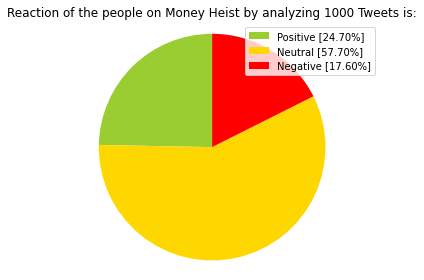

In [ ]:
labels = ['Positive ['+str(positive)+'%]', 
          'Neutral ['+str(neutral)+'%]', 
          'Negative ['+str(negative)+'%]']

sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']

patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title('Reaction of the people on '
          + search_term +' by analyzing '
          + str(no_of_tweets) +' Tweets is:')
plt.axis('equal')
plt.tight_layout()
plt.show()